# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

[5 pts]

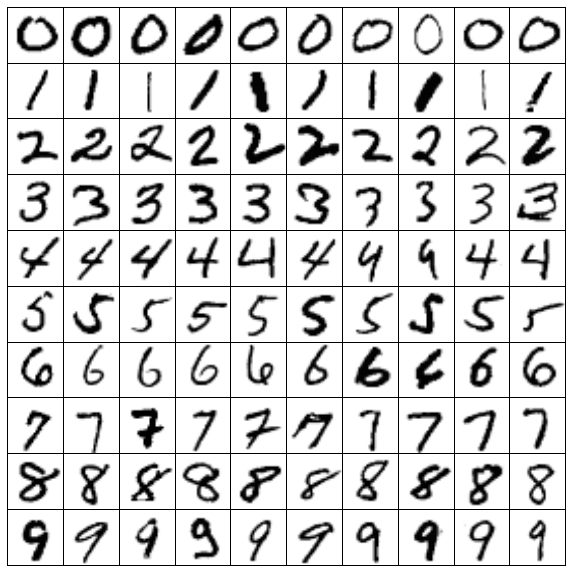

In [46]:
def P1(num_examples=10):

### STUDENT START ###
    # Define image properties
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(num_examples,len(np.unique(Y))), dpi=X.shape[1])
    # For each digit (from 0 to 9)
    for i in np.nditer(np.unique(Y)):
        # Create a ndarray with the features of "num_examples" examples of digit "i"
        features = X[Y == i][:num_examples]
        # For each of the "num_examples" examples
        for j in range(num_examples):
            # Create subplot (from 1 to "num_digits"*"num_examples" of each digit)
            plt.subplot(len(np.unique(Y)), num_examples, i * num_examples + j + 1)
            plt.subplots_adjust(wspace=0, hspace=0)
            # Hide tickmarks and scale
            ax = plt.gca()
            # ax.set_axis_off() # Also hide axes (frame) 
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            # Plot the corresponding digit (reshaped to square matrix/image)
            dim = int(np.sqrt(X.shape[1]))
            digit = features[j].reshape((dim,dim))            
            plt.imshow(digit)
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

[3 pts]

In [47]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        # Create a kNN model
        kNN_model = KNeighborsClassifier(n_neighbors=k)
        # Fit the model with the mini training set
        kNN_model.fit(mini_train_data, mini_train_labels)
        # Predict the dev set
        dev_predicted_labels = kNN_model.predict(dev_data)
        # Report accuracy for the dev set
        print 'Accuracy using k = {0:d} neighbors: {1:.3f}'.format(k, kNN_model.score(dev_data, dev_labels))
        
        # Double-check
        # (dev_predicted_labels == dev_labels).sum().
        # astype('f2') / dev_labels.shape
        
        # For k=1, show precision, recall, and F1 for each label.
        if k == 1:
            labels = np.unique(Y).astype(int).astype('S')
            print '\nPrecission, recall, and F1 for each digit when k = 1:'
            print classification_report(dev_labels, dev_predicted_labels, target_names = labels)
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy using k = 1 neighbors: 0.888

Precission, recall, and F1 for each digit when k = 1:
             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy using k = 3 neighbors: 0.878
Accuracy using k = 5 neighbors: 0.869
Accuracy using k = 7 neighbors: 0.865
Accuracy using k = 9 neighbors: 0.863


ANSWER: **The most difficult digit (for k=1, and the random training set and the dev set that have been used) is 9: precision is lower for 3, and recall is lower for 2, but 9 has the lower F1-score, which considers both pricission and recall.**

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

[2 pts]

In [48]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    elapsed_times = []
    # Create a 1NN model
    NN_model = KNeighborsClassifier(n_neighbors=1)
    # For different training set sizes...
    for size in train_sizes:
        # Estimate computation time
        start = time.time()
        # Fit the model with the corresponding training set
        train_data, train_labels = X[:size], Y[:size]
        NN_model.fit(train_data, train_labels)
        # Estimate the dev set accuracy
        accuracies.append(NN_model.score(dev_data, dev_labels))
        end = time.time()
        elapsed_times.append(end - start)
    print ''.join('Training size = {0:5d} => Accuracy = {1:.3f} => Elapsed time = {2:4.2f}\n'.format(x,y,z) for x,y,z in 
                  zip(train_sizes, accuracies, elapsed_times))
    # Computation Time grows almost linearly with training set size
    # Although the growth of growth is kind of logarithmic (or square root)
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Training size =   100 => Accuracy = 0.720 => Elapsed time = 0.16
Training size =   200 => Accuracy = 0.786 => Elapsed time = 0.31
Training size =   400 => Accuracy = 0.841 => Elapsed time = 0.63
Training size =   800 => Accuracy = 0.884 => Elapsed time = 1.29
Training size =  1600 => Accuracy = 0.902 => Elapsed time = 2.71
Training size =  3200 => Accuracy = 0.926 => Elapsed time = 5.38
Training size =  6400 => Accuracy = 0.937 => Elapsed time = 11.06
Training size = 12800 => Accuracy = 0.959 => Elapsed time = 23.37
Training size = 25000 => Accuracy = 0.970 => Elapsed time = 48.05



(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

[3 pts]

Accuracy for n = 60000 (y=a+bX):        1.243

Accuracy for n = 60000 (y=a+b*log(X)):  1.034
Accuracy for n = 60000 (Y=a+b*sqrt(X)): 1.131
Accuracy for n = 60000 (y=a+b*log(X)):  1.013


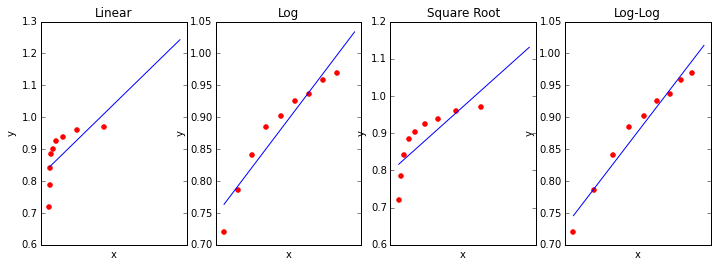

In [49]:
def P4():

### STUDENT START ###
    # First we traspose the features (training set size) and labels (accuracy)
    X = np.array(train_sizes)[:,np.newaxis]
    y = np.array(accuracies)[:,np.newaxis]
    regression_model = LinearRegression()
    regression_model .fit(X, y)
    print 'Accuracy for n = 60000 (y=a+bX): {0:12.3f}\n'.format(regression_model.predict([60000]).tolist()[0])
    # The predicted value for n = 6000 exceeds 1 which is not possible
    
    # Plot regression line and the examples used to fit the model    
    plt.figure(figsize=(12, 4))
    ax = plt.subplot(1, 4, 1)
    plt.setp(ax, xticks=())
    x = np.linspace(X.min(), 60000, 100)[:,np.newaxis]
    plt.plot(x, regression_model .predict(x))
    plt.scatter(X, y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Linear')
    # The X-axis ranges from the minimum training set we used (100) to 60000: 
    # we can observe that the corresponding value of Y for that value of X is greater than 1 (maximum possible accuracy) 

    # Let's try to transform X, using its log instead
    logX = np.log10(X)
    regression_model .fit(logX, y)
    print 'Accuracy for n = 60000 (y=a+b*log(X)): {0:6.3f}'.format(regression_model.predict(np.log10([60000])).tolist()[0])
    # The accuracy still exceeds 1 but not so much
    # Moreover, the graph shows that the model fits the data much better (the examples are more aligned to the regression line)
    ax = plt.subplot(1, 4, 2)
    plt.setp(ax, xticks=())
    x = np.linspace(np.log10(X.min()), np.log10(60000), 100)[:,np.newaxis]
    plt.plot(x, regression_model .predict(x))
    plt.scatter(np.log10(X), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Log')

    # Let's also try the square root of X (very similar to the log)
    sqrtX = np.sqrt(X)
    regression_model .fit(sqrtX, y)
    print 'Accuracy for n = 60000 (Y=a+b*sqrt(X)): {0:5.3f}'.format(regression_model.predict(np.sqrt([60000])).tolist()[0])
    # This model is not so good, but still better than the linear model without transformation
    ax = plt.subplot(1, 4, 3)
    plt.setp(ax, xticks=())
    x = np.linspace(np.sqrt(X.min()), np.sqrt(60000), 100)[:,np.newaxis]
    plt.plot(x, regression_model .predict(x))
    plt.scatter(np.sqrt(X), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Square Root')

    # And finally the log of the log of X (because log(X) vs. y was still a concave curve
    log_logX = np.log10(np.log10(X))
    regression_model .fit(log_logX, y)
    print 'Accuracy for n = 60000 (y=a+b*log(X)): {0:6.3f}'.format(regression_model.predict(np.log10(np.log10([60000]))).tolist()[0])
    # Now the predicted value is very close to 1: we just would have to make a small adjustment, 
    # or even accept this model as valid if we don't expect to use samples so large 
    ax = plt.subplot(1, 4, 4)
    plt.setp(ax, xticks=())
    x = np.linspace(np.log10(np.log10(X.min())), np.log10(np.log10(60000)), 100)[:,np.newaxis]
    plt.plot(x, regression_model .predict(x))
    plt.scatter(np.log10(np.log10(X)), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Log-Log')
### STUDENT END ###

P4()

ANSWER: **The value predicted by the linear model for n=60000 is greater than 1, the maximum value for the accuracy, which doesn't make sense: a linear model does not fit well (besides, we're predicting out of the range of our examples (the *confidence ellipsoid* in multivariate regression). If we use the square root of the feature x, the model is slightly better, the logarithm of x is even better, and the log-log transformation is almost a perfect fit (though the predicted value for n=60000 is still above 1).**

Fit a 1-NN and output a confusion matrix for the dev data. For each of the top 5 confused pairs, display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[4 pts]

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

4 of the 14 cases in which the digit 4 is confused with the digit 9.
4 of the  9 cases in which the digit 5 is confused with the digit 3.
4 of the  9 cases in which the digit 9 is confused with the digit 4.
4 of the  5 cases in which the digit 8 is confused with the digit 3.
4 of the  5 cases in which the digit 9 is confused with the digit 7.


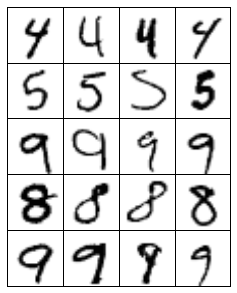

In [50]:
def P5():

### STUDENT START ###
    # Create a 1NN model
    NN_model = KNeighborsClassifier(n_neighbors=1)
    # Fit the model with the "mini" training set
    NN_model.fit(mini_train_data, mini_train_labels)
    # Create the confusion matrix for the dev data
    confusion = confusion_matrix(dev_labels, NN_model.predict(dev_data))
    print confusion
    print
    # The diagonal elements corresponds to success pairs
    # Delete them since we're interested in errors (confused pairs)
    np.fill_diagonal(confusion, 0)
    num_confused_pairs = 5
    num_examples = 4
    # Display the top "num_examples" confused pairs
    dim = int(np.sqrt(X.shape[1]))
    # Define image properties
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(num_examples,num_confused_pairs), dpi=X.shape[1])
    for i in range(num_confused_pairs):
        # Find the position of the (left) top confused pair
        row,col = np.unravel_index(confusion.argmax(), confusion.shape)
        # Hence, row corresponds to the true digit and col to the (wrongly) predicted digit
        features_confused_digit = dev_data[(dev_labels == row) & (NN_model.predict(dev_data) == col)]
        np.random.shuffle(features_confused_digit)
        print '4 of the {0:2d} cases in which the digit {1:d} is confused with the digit {2:d}.'.format(confusion.max(), 
                                                                                                        row, col)
        for j in range(num_examples):
            # Create subplot
            plt.subplot(num_confused_pairs, num_examples, i*num_examples + j + 1)
            plt.subplots_adjust(wspace=0, hspace=0)
            # Hide tickmarks and scale
            ax = plt.gca()
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            # Plot the corresponding digit
            # (reshaped to square matrix/image)
            confused_digit = features_confused_digit[j].reshape((dim,dim))
            plt.imshow(confused_digit)
        # After displaying a top confused pair, delete it to display the next
        confusion[row,col] = 0    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

[4 pts]

Accuracy for unpreprocessed dev data with unpreprocessed train data: 0.888

Accuracy for unpreprocessed dev data with preprocessed train data:   0.905
Accuracy for preprocessed dev data with unpreprocessed train data:   0.875
Accuracy for preprocessed dev data with preprocessed train data:     0.901


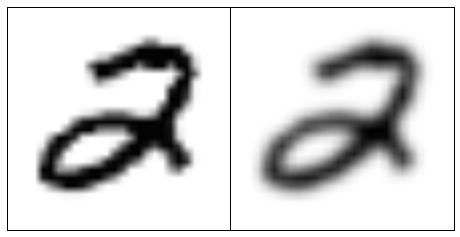

In [51]:
def P6():
    
### STUDENT START ###
    def gaussian_blur(image, sigma):
        dim = int(np.sqrt(len(image)))
        # Create a copy of the image
        blurred_image = np.copy(image)
        # An array of possible coordinates
        coordinates =np.zeros((dim,dim,2))
        for i in range(coordinates.shape[0]):
            for j in range(coordinates.shape[1]):
                coordinates[i,j,0]= i
                coordinates[i,j,1]= j
        # Find the 9 nearest neighbors to a pixel (including itself)
        find_neighbors = KNeighborsClassifier(n_neighbors=9)
        find_neighbors.fit(np.concatenate(coordinates), np.zeros(dim*dim))
        # For each pixel in the image
        for row in range(dim):
            for col in range(dim):
                # The following give us the 9 neighbors and its distances (1st will be 0)
                neighbors = find_neighbors.kneighbors([row, col])
                weights = np.exp(-(np.square(neighbors[0])) / (2*np.square(sigma)))/(2*np.pi*np.square(sigma))
                # Sum of weights = 1
                weights = weights/weights.sum()
                # Create the blurred image as a weighted combination of the original value and the 8 neighboring values
                blurred_image[row*dim+col] = np.average(image[neighbors[1]], weights=weights.tolist())
        return blurred_image
    
    # An example of how a random digit looks like after blurring
    dim = int(np.sqrt(X.shape[1]))
    random_image = X[np.random.choice(X.shape[0])]
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(8, 4), dpi=X.shape[1])
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.imshow(random_image.reshape(dim,dim))
    plt.subplot(1, 2, 2)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.imshow(gaussian_blur(random_image,1).reshape(dim,dim))
    
    # Create a 1NN model
    NN_model = KNeighborsClassifier(n_neighbors=1)
    # Blur both sets (with sigma=1)
    blurred_train_data = np.apply_along_axis(gaussian_blur, 1, mini_train_data, 1)
    blurred_dev_data = np.apply_along_axis(gaussian_blur, 1, dev_data, 1)
    # Analyze the 4 possible cases
    NN_model.fit(mini_train_data, mini_train_labels)
    print 'Accuracy for unpreprocessed dev data with unpreprocessed train data: {0:5.3f}\n'.format(NN_model.score(dev_data, 
                                                                                                                  dev_labels))
    NN_model.fit(blurred_train_data, mini_train_labels)
    print 'Accuracy for unpreprocessed dev data with preprocessed train data: {0:7.3f}'.format(NN_model.score(dev_data, 
                                                                                                              dev_labels))
    NN_model.fit(mini_train_data, mini_train_labels)
    print 'Accuracy for preprocessed dev data with unpreprocessed train data: {0:7.3f}'.format(NN_model.score(blurred_dev_data, 
                                                                                                              dev_labels))
    NN_model.fit(blurred_train_data, mini_train_labels)
    print 'Accuracy for preprocessed dev data with preprocessed train data: {0:9.3f}'.format(NN_model.score(blurred_dev_data, 
                                                                                                            dev_labels))
### STUDENT END ###

P6()

ANSWER: **Accuracy is better when both datasets are preprocessed, and even more if only the training set is preprocessed, but it is slightly worse if only the dev set is preprocessed. Blurring filters (eliminates) high-frequency noise, reducing detail and hence what makes the image of a digit differ from another image of the same digit: by blurring the examples that we use to train the model, the borders of each label space are better defined (other way to say this is that the examples are more generalizable, so the effect is the opposite of overfitting); but if we only blur the data we want to predict, we run the risk of eliminating features (details) that are similar to the proper label, keeping features that are similar to other labels.**

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

[4 pts]

Accuracy of Binomial NB: 0.819
Accuracy of Multinomial NB: 0.802


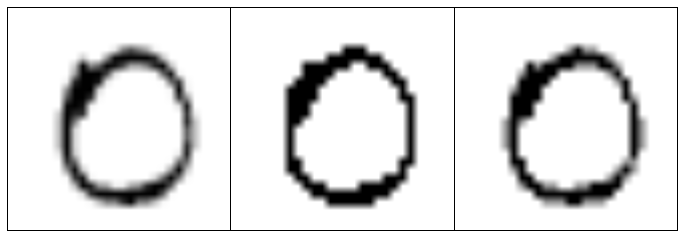

In [52]:
def P7():

### STUDENT START ###
    # Binomial NB
    BinomialNB_model = BernoulliNB(binarize=0.333)
    # I use the argument given by the function
    # To binarize the datasets we could also use a simpler version of the transformation used below, in Multinomial NB
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
    print 'Accuracy of Binomial NB: {0:.3f}'.format(BinomialNB_model.score(dev_data, dev_labels))
    
    # Multinomial NB
    MultinomialNB_model = MultinomialNB()
    trinarized_train_data = np.where((mini_train_data > 0.333) & (mini_train_data < 0.667), 1, 
                                     np.where(mini_train_data > 0.333, 2, 0))
    trinarized_dev_data = np.where((dev_data > 0.333) & (dev_data < 0.667), 1, np.where(dev_data > 0.333, 2, 0))
    MultinomialNB_model.fit(trinarized_train_data, mini_train_labels)
    print 'Accuracy of Multinomial NB: {0:.3f}'.format(MultinomialNB_model.score(trinarized_dev_data, dev_labels))
    
    # An example of how a random digit looks like after binarizing or trinarizing its pixels
    dim = int(np.sqrt(X.shape[1]))
    random_image = X[np.random.choice(X.shape[0])]
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(12,4), dpi=X.shape[1])
    plt.subplot(1, 3, 1)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.imshow(random_image.reshape(dim,dim))
    plt.subplot(1, 3, 2)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    binarized_random_image = np.where(random_image < 0.5, 0, 1)
    plt.imshow(binarized_random_image.reshape(dim,dim))
    # The image becomes much more defined
    plt.subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    trinarized_random_image = np.where((random_image > 0.333) & (random_image < 0.667), 0.5, 
                                       np.where(random_image > 0.333, 1, 0))
    plt.imshow(trinarized_random_image.reshape(dim,dim))
    # Still not as blurred as the original    
### STUDENT END ###

P7()

ANSWER: **The multi-class version does *not* improve the results. If we change the thresholds (e.g., to 0.25 and 0.75 instead of 0.33 and 0.66) the accuracy of tha version is even worse (below 0.810). Binarizing is another way of filtering noise, so (with less categories) we make the image more precise and defined, hence increasing *P(feature|label)*, and also *P(label|feature)*. Considering more categories would decrease the accuracy to even lower values.**

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter). What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

[3 pts]

In [53]:
def P8(alphas):

### STUDENT START ###
    nb = GridSearchCV(BernoulliNB(binarize=0.333), alphas)
    nb.fit(mini_train_data, mini_train_labels)
    for i in range(len(nb.grid_scores_)):
        print nb.grid_scores_[i]
    print '\nFor alpha = 0, the accuracy is {0:.3f}.'.format(nb.grid_scores_[0][1])
    return nb
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}
mean: 0.82400, std: 0.01626, params: {'alpha': 0.0001}
mean: 0.82500, std: 0.01531, params: {'alpha': 0.001}
mean: 0.82600, std: 0.01438, params: {'alpha': 0.01}
mean: 0.82200, std: 0.01835, params: {'alpha': 0.1}
mean: 0.81500, std: 0.01230, params: {'alpha': 0.5}
mean: 0.81300, std: 0.01455, params: {'alpha': 1.0}
mean: 0.79900, std: 0.01363, params: {'alpha': 2.0}
mean: 0.76100, std: 0.01037, params: {'alpha': 10.0}

For alpha = 0, the accuracy is 0.092.


In [54]:
print nb.best_params_

{'alpha': 0.01}


ANSWER: **The best value for alpha is 0.01. Accuracy seems to follow a parabola (at least from alpha = 0.0001 on) that reaches its maximum (about 0.82) when alpha = 0.01. But for alpha = 0 is very low (<0.1): this seems normal, since alpha = 0 implies that we don't trust at all p(x|y), and only consider p(x).**

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

[3 pts]

Accuracy of Gaussian NB: 0.627
Best approximate value of sigma: 0.20
Accuracy of new GaussianNB = 0.81


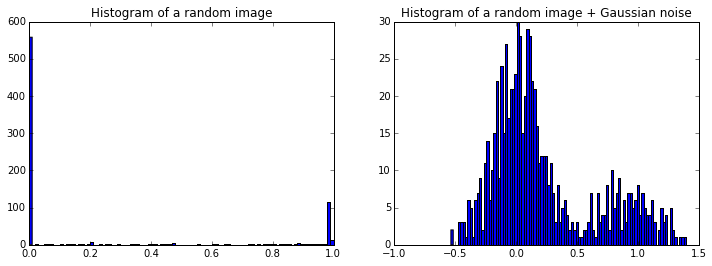

In [55]:
def P9():

### STUDENT END ###
    # Create a Gaussian NB model
    GaussianNB_model = GaussianNB()
    # Fit the model with the mini training set
    GaussianNB_model.fit(mini_train_data, mini_train_labels)
    # Report accuracy for the dev set
    print 'Accuracy of Gaussian NB: {0:.3f}'.format(GaussianNB_model.score(dev_data,dev_labels))
    
    # print 'Mean of the feature mean for each digit:\n'
    # print GaussianNB_model.theta_.mean(axis=1)
    # print 'Mean of the feature dispersion for each digit:\n'
    # print GaussianNB_model.sigma_.mean(axis=1)
    
    # This model expects the features to be normally distributed but they're almost binary (0 or 1), 
    # that's why the Binomial NB model works better.
    # Let's plot the histogram of a random digit to prove it,
    # together with the histogram of its features when  gaussian noise is added.
    random_image = X[np.random.choice(X.shape[0])]
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    fig = plt.hist(random_image, 100)
    plt.title('Histogram of a random image')
    plt.subplot(1, 2, 2)
    fig = plt.hist(random_image + np.random.normal(0, 0.2, random_image.shape), 100)
    plt.title('Histogram of a random image + Gaussian noise')
    
    # Explore which value of sigma maximizes accuracy
    sigmas = np.arange(0.05, 1.05, 0.05)
    accuracies = np.zeros(sigmas.shape)
    for i in range(sigmas.shape[0]):
        new_train_data = mini_train_data + np.random.normal(0,sigmas[i], mini_train_data.shape)
        new_dev_data = dev_data + np.random.normal(0,sigmas[i], mini_train_data.shape)
        GaussianNB_model.fit(new_train_data, mini_train_labels)
        accuracies[i] = GaussianNB_model.score(new_dev_data, dev_labels)
    sigma=sigmas[accuracies.argmax()]
    print 'Best approximate value of sigma: {0:.2f}'.format(sigma)
    # Most common values are still (around) 0 and 1 in the 2nd histogram
    
    new_train_data = mini_train_data + np.random.normal(0,sigma,mini_train_data.shape)
    new_dev_data = dev_data + np.random.normal(0,sigma,mini_train_data.shape)
    GaussianNB_model.fit(new_train_data, mini_train_labels)
    print 'Accuracy of new GaussianNB = {0}'.format(GaussianNB_model.score(new_dev_data, dev_labels))
    return GaussianNB_model
### STUDENT END ###

gnb = P9()

ANSWER: **The Gaussian NB model expects the features to be normally distributed, but that's not the case here: they're almost binary (0 in most of the pixels, or 1): that's why the Binomial NB model worked better. By adding gaussian noise (of mean zero and the standard deviation that maximizes the accuracy on the dev set), the features of the preprocessed images follow a distribution closer to normality, and the model works as well as the Binomila NB one.**

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

[5 pts]

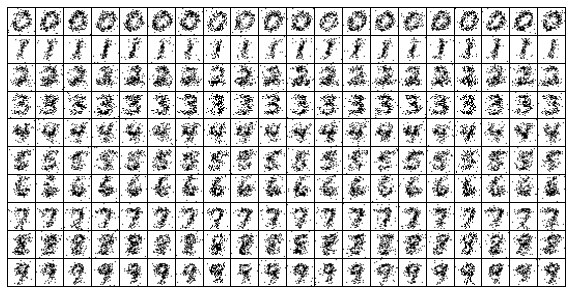

In [56]:
def P10(num_examples):

### STUDENT START ###
    BinomialNB_model = BernoulliNB(binarize=0.333)
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
    probs = np.exp(BinomialNB_model.feature_log_prob_)
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(10, 5), dpi=X.shape[1])
    # For each digit (from 0 to 9)
    for i in range(len(np.unique(Y))):
        # Create a ndarray with the features of
            # "num_examples" examples of digit "i"
        # For each of the "num_examples" examples
        for j in range(num_examples):
            # Create subplot
                # (from 1 to "num_digits"*"num_examples" of each digit)
            example = np.where(probs[i,:]>np.random.rand(X.shape[1]),
                               1,0)
            plt.subplot(len(np.unique(Y)), num_examples, 
                        i * num_examples + j + 1)
            plt.subplots_adjust(wspace=0, hspace=0)
            # Hide tickmarks and scale
            ax = plt.gca()
            # ax.set_axis_off() # Also hide axes (frame)
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            # Plot the corresponding digit
            dim = int(np.sqrt(X.shape[1]))
            digit = example.reshape((dim,dim))
            plt.imshow(digit)
### STUDENT END ###

P10(20)

ANSWER:  **The generated digits look much fuzzier than the real ones, but overall they're similar to what they should look like, giving an idea of the general pattern, i.e., which pixles should be on in each digit.**

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train BernoulliNB model with a reasonable alpha value. Get the maximum posterior probability for each prediction and fill in the corresponding values for "correct" and "total" so you can display the accuracy for each bucket. Don't make the buckets cumulative -- that is, each maximum posterior should correspond to a single bucket.

How would you characterize the calibration for the Naive Bayes model?

[3 pts]

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  29    accuracy = 0.483
p(pred) <= 0.9990000000000    total =  97    accuracy = 0.443
p(pred) <= 0.9999900000000    total =  66    accuracy = 0.636
p(pred) <= 0.9999999000000    total =  58    accuracy = 0.655
p(pred) <= 0.9999999990000    total =  59    accuracy = 0.763
p(pred) <= 0.9999999999900    total =  64    accuracy = 0.844
p(pred) <= 0.9999999999999    total =  72    accuracy = 0.833
p(pred) <= 1.0000000000000    total = 555    accuracy = 0.962


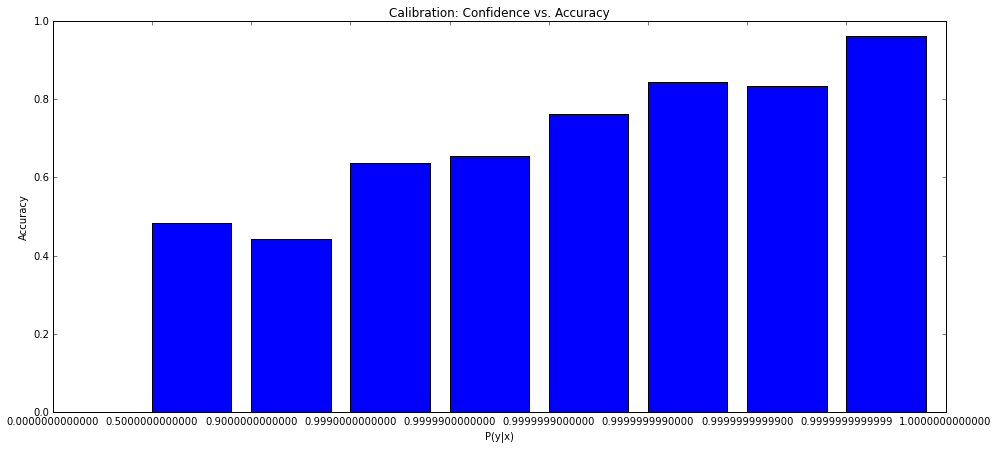

In [57]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # Create a Binomial NB model
    BinomialNB_model = BernoulliNB(alpha=nb.best_params_['alpha'], binarize=0.333)
    # Fit it with the mini training set
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
    # Predict labels and probabilities of dev set
    dev_predicted_labels = BinomialNB_model.predict(dev_data)
    dev_predicted_probs = BinomialNB_model.predict_proba(dev_data)
    # Define some aux variables: buckets_copy and acc
    buckets_copy = list(buckets)
    # Each bucket ranges from the prior value to the current one: first prior value is 0 
    buckets_copy.insert(0, 0.)
    # Accuracy for each bucket (to display it)
    acc = [0.]*len(buckets)
    # For every bucket (-> depends on input to function)
    for i in range(1,len(buckets)+1):
        # Goes from 1 to len(buckets) because we'll use buckets_copy to compare probabilities
        label_into_bucket = np.zeros(dev_predicted_labels.shape[0])
        count_correct = 0
        count_total = 0
        # For every prediction (for every item in dev set -> 1000)
        for j in range(dev_predicted_probs.shape[0]):
            # Search the maximum posterior probability (it may correspond to the correct label or not)
            prob = dev_predicted_probs[j, dev_predicted_probs[j].argmax()]
            # If that maximum posterior is inside the current bucket (threshold under study) we take it into account
            label_into_bucket[j] = np.where((prob <= buckets_copy[i]) & (prob > buckets_copy[i-1]), 1, 0)
            # If posterior was within the current bucket for that item
            if label_into_bucket[j] == 1:
                # increase count of total
                count_total +=1
                # If prediction was correct
                if dev_predicted_labels[j] == dev_labels[j]:
                    # increase count of correct
                    count_correct += 1
        # Count total and correct cases for each particular item
        # Make at least one of them a float to allow non-integer division
        correct[i-1] = float(count_correct)
        total[i-1] = float(count_total)
        # Update acc(uracy) (used to display it)
        if (total[i-1] > 0): acc[i-1] = correct[i-1] / total[i-1]
    
    # Display Posterior vs. Accuracy
    buck = ["{:.13f}".format(i) for i in buckets_copy]
    plt.figure(figsize=(16,7))
    fig = plt.bar(range(len(buckets)), acc)
    plt.title('Calibration: Confidence vs. Accuracy')
    plt.xlabel('P(y|x)')
    plt.ylabel('Accuracy')
    ax = plt.gca()
    ax.set_xticklabels(buck)                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER: **Our classifier is not perfectly calibrated, as depicted in the graph above: posterior and accuracy are not always positively correlated (see 2nd and 8th buckets: P=0.9 and P=0.9999999999999). I.e., higher confidence does not always correspond with higher accuracy, so we cannot always infer something about the accuracy of the classifier given the posterior.**